# House Prices - Advanced Regression Techniques


The dataset is about predicting the house price based on several other features. This dataset contains 81 columns, if all selected can lead to bad predictions. So we are taking some of the columns which has more correlation with our Target variable = **'SalePrice'**

### Brief Description of Dataset Columns:

<h3>Here's a brief version of what you'll find in the data description file.</h3>

**SalePrice** - the property's sale price in dollars. This is the target variable that we are trying to predict.

**MSSubClass**: The building class

**MSZoning**: The general zoning classification

**LotFrontage**: Linear feet of street connected to property

**LotArea**: Lot size in square feet

**Street**: Type of road access

**Alley**: Type of alley access

**LotShape**: General shape of property

**LandContour**: Flatness of the property

**Utilities**: Type of utilities available

**LotConfig**: Lot configuration

**LandSlope**: Slope of property

**Neighborhood**: Physical locations within Ames city limits

**Condition1**: Proximity to main road or railroad

**Condition2**: Proximity to main road or railroad (if a second is present)

**BldgType**: Type of dwelling

**HouseStyle**: Style of dwelling

**OverallQual**: Overall material and finish quality

.....

In [1]:
# Importing Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
# Reading the train dataset
df_train = pd.read_csv('train.csv')

In [68]:
# Reading the test dataset
df_test = pd.read_csv('test.csv')

In [69]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [70]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [71]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [72]:
df_train.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [73]:
# descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# Exploratory Data Analysis

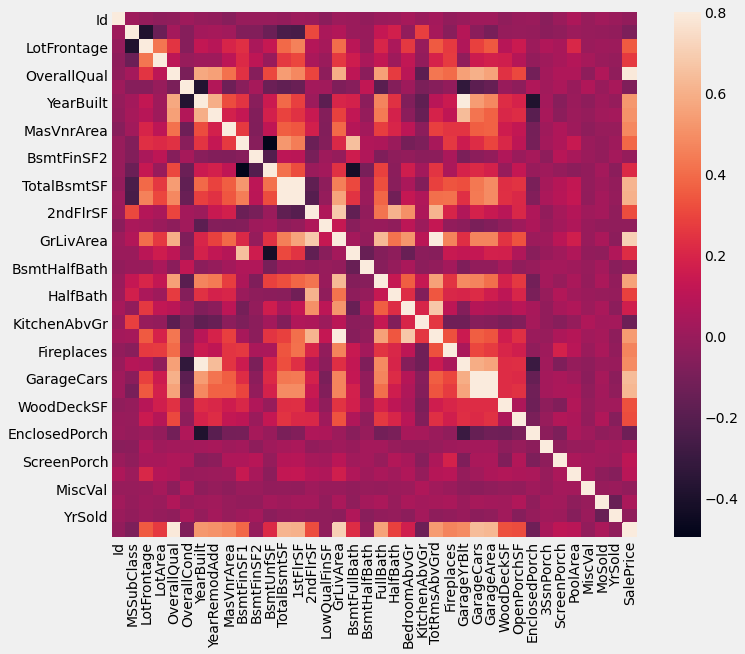

In [74]:
# correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

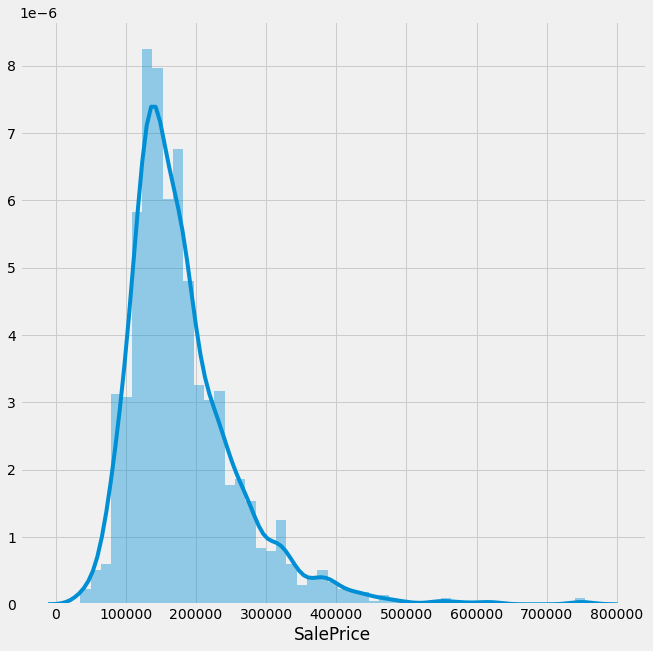

In [75]:
# min price is larger than zero
# also there are some outliers which we will remove later onwards
plt.figure(figsize=(10,10))
sns.distplot(df_train['SalePrice']);

<Figure size 720x720 with 0 Axes>

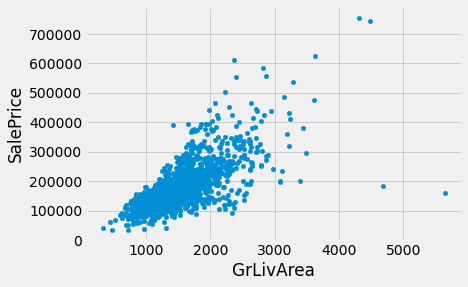

In [76]:
# scatter plot grlivarea/saleprice
plt.figure(figsize=(10,10))
plt.style.use('fivethirtyeight')
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice')

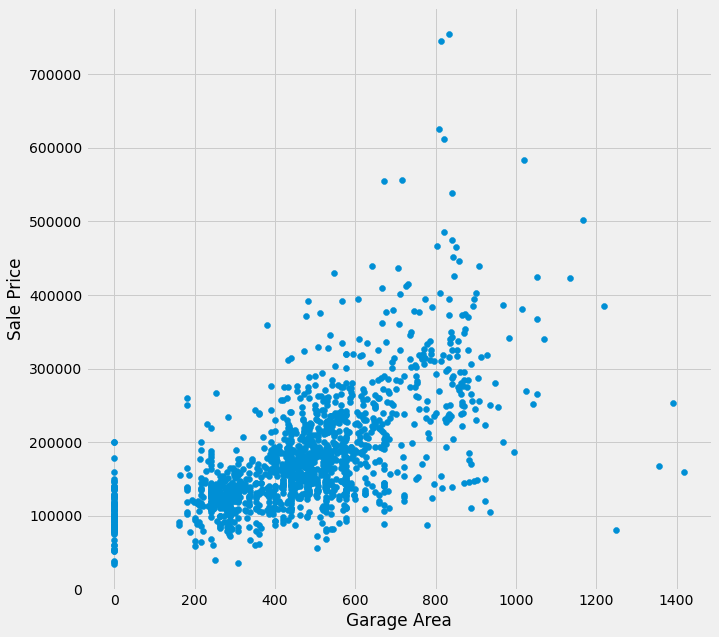

In [77]:
# scatter plot garagearea/saleprice
plt.figure(figsize=(10,10))
plt.scatter(x=df_train['GarageArea'], y=df_train['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

<Figure size 720x720 with 0 Axes>

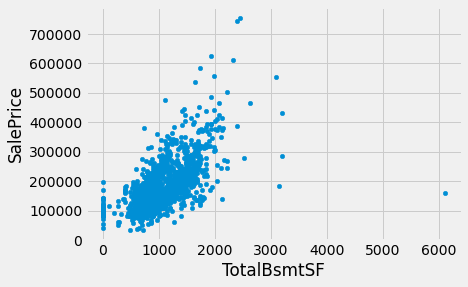

In [78]:
# scatter plot totalbsmtsf/saleprice
plt.figure(figsize=(10,10))
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice')

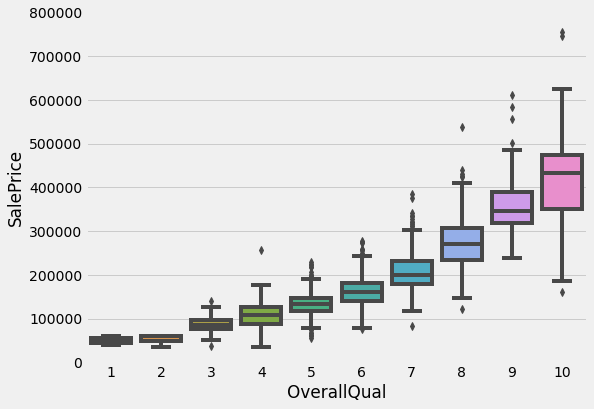

In [79]:
# box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

## Checking for nulls

In [80]:
nulls = pd.DataFrame(df_train.isnull().sum().sort_values(ascending=False)[:30])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageCond,81
GarageType,81
GarageYrBlt,81


In [81]:
# filling nulls with the mean and median values of numerical columns

df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(df_train['GarageYrBlt'].median() )
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].mean() )
df_train['LotFrontage'] = df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean() )

df_train['BsmtFinSF1'] = df_train['BsmtFinSF1'].fillna(df_train['BsmtFinSF1'].median() )
df_train['BsmtFinSF2'] = df_train['BsmtFinSF2'].fillna(df_train['BsmtFinSF2'].mean() )
df_train['BsmtFullBath'] = df_train['BsmtFullBath'].fillna(df_train['BsmtFullBath'].mean() )
df_train['BsmtHalfBath'] = df_train['BsmtHalfBath'].fillna(df_train['BsmtHalfBath'].mean() )
df_train['BsmtUnfSF'] = df_train['BsmtUnfSF'].fillna(df_train['BsmtUnfSF'].mean() )
df_train['GarageArea'] = df_train['GarageArea'].fillna(df_train['GarageArea'].mean() )
df_train['GarageCars'] = df_train['GarageCars'].fillna(df_train['GarageCars'].mean() )
df_train['TotalBsmtSF'] = df_train['TotalBsmtSF'].fillna(df_train['TotalBsmtSF'].mean() )

In [82]:
# removing outliers from target
df_train = df_train[df_train['SalePrice']<450000]

In [83]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [84]:
# now after handling of nulls the data is much better
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1446.000000,1446.000000,1446.000000,1446.000000,1446.00000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1446.000000,1446.000000,1446.00000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000
mean,729.702628,56.995159,69.789688,10426.825726,6.06639,5.577455,1971.030429,1984.684647,99.447301,436.552559,...,93.262794,45.937759,22.166667,3.44260,14.527663,2.401798,43.910097,6.331950,2007.815353,177268.663900
std,422.074796,42.446131,21.822304,9927.254968,1.34695,1.113250,30.114667,20.654418,171.520786,446.360566,...,124.484376,65.723213,61.376116,29.45708,54.448467,37.664404,498.502039,2.704688,1.326258,69949.609762
min,1.000000,20.000000,21.000000,1300.000000,1.00000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,364.250000,20.000000,60.000000,7500.000000,5.00000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,728.500000,50.000000,70.049958,9434.500000,6.00000,5.000000,1972.000000,1993.000000,0.000000,380.500000,...,0.000000,24.000000,0.000000,0.00000,0.000000,0.000000,0.000000,6.000000,2008.000000,162000.000000
75%,1094.750000,70.000000,78.000000,11494.500000,7.00000,6.000000,2000.000000,2004.000000,160.000000,703.500000,...,168.000000,66.000000,0.000000,0.00000,0.000000,0.000000,0.000000,8.000000,2009.000000,212000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.00000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.00000,480.000000,738.000000,15500.000000,12.000000,2010.000000,446261.000000


In [20]:
# from the above correlation heatmap we can see that these columns have good correlation with taget varible
# so only selecting the data that we need
x_train = df_train[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']]
y_train = df_train['SalePrice']
x_train.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
0,7,1710,2,548,856,856,2,8,2003
1,6,1262,2,460,1262,1262,2,6,1976
2,7,1786,2,608,920,920,2,6,2001
3,7,1717,3,642,756,961,1,7,1915
4,8,2198,3,836,1145,1145,2,9,2000


In [21]:
x_train.isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
dtype: int64

In [24]:
x_test = df_test[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']]
y_test = df_train['SalePrice']
x_test.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
0,5,896,1.0,730.0,882.0,896,1,5,1961
1,6,1329,1.0,312.0,1329.0,1329,1,6,1958
2,5,1629,2.0,482.0,928.0,928,2,6,1997
3,6,1604,2.0,470.0,926.0,926,2,7,1998
4,8,1280,2.0,506.0,1280.0,1280,2,5,1992


In [25]:
x_test.isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      1
GarageArea      1
TotalBsmtSF     1
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
dtype: int64

In [26]:
# handling the nulls
x_test['GarageCars'].fillna(df_test.GarageCars.median(), inplace = True)
x_test['GarageArea'].fillna(df_test.GarageArea.mean(), inplace = True)
x_test['TotalBsmtSF'].fillna(df_test.GarageArea.mean(), inplace = True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [27]:
x_test.isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
dtype: int64

# Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
print('slope ： {:0.2f}'.format(model.coef_[0]))
print('intercept : {:0.2f}'.format(model.intercept_))

slope ： 19888.02
intercept : -781698.94


In [56]:
print('TRAINING ACCURACY : ',model.score(x_train,y_train))

TRAINING ACCURACY :  0.7785044396849818


In [29]:
y = model.predict(x_test)

In [30]:
final_reg = pd.DataFrame({'Id':df_test['Id'].values, 'SalePrice':y})
final_reg.head(10)

,Id,SalePrice
0,1461,118991.258317
1,1462,162316.644621
2,1463,166646.674251
3,1464,185868.186242
4,1465,220056.325823
5,1466,181082.348940
6,1467,172474.256421
7,1468,175053.683339
8,1469,207878.928211
9,1470,109347.144711


# Random Forrest Regressor

In [49]:
#from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=300, random_state=0, max_depth = 300, max_features = 1)

model.fit(x_train, y_train)
model.score(x_train,y_train)
y_pred = model.predict(x_test)

# evaluating the model

print("TRAINING ACCURACY :", model.score(x_train, y_train))

TRAINING ACCURACY : 0.9767507184323792


In [50]:
y_pred

array([125690.76      , 152883.43666667, 174540.98888889, ...,
       148399.75666667, 111849.33333333, 241381.85666667])

In [51]:
final_reg = pd.DataFrame({'Id':df_test['Id'].values, 'SalePrice':y_pred})
final_reg.head(10)

,Id,SalePrice
0,1461,125690.760000
1,1462,152883.436667
2,1463,174540.988889
3,1464,183579.666667
4,1465,199928.186667
5,1466,177669.105556
6,1467,171565.450000
7,1468,177100.216667
8,1469,191874.820000
9,1470,114792.500000


So from above predictions we can see that the Linear Regression gives best predictions. We didn't chose Random Forest Regressor because the training accurac was very high and can be a result of overfitting.

Therefore, Linear Regression should be considered for the above dataset to get the best results

# Thank You!